<div class="alert alert-block alert-info">
<b>SubmissionBy:</b> Pravar More</div>


<div class="alert alert-block alert-success">
<b>Email:</b> morepravar@gmail.com</div>

<div class="alert alert-block alert-warning">
<b>Phone:</b> +91 8517949251</div>



In [117]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn


# `using sklearn`  
>by acmeGrade 
#### (Multiclass Classification)

In [130]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml

# fetching dataSet and dividing into test and train

In [131]:
mnist_dataSet = fetch_openml('mnist_784',as_frame=False)       #from sklearn
x,y = mnist_dataSet.data,mnist_dataSet.target    

x_train,x_test,y_train,y_test = x[:60000],x[60000,],y[:60000],y[60000:]    #dividing from x,y  to test and train

# just to verify and check for particular index train Value and its x_train and y_train

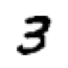

in y_train: 3


In [132]:
def plot_digit(image_data):                           #for sklearn dataset
    images = image_data.reshape(28,28)
    plt.figure(figsize=(1,1))
    plt.imshow(images,cmap='binary')
    plt.axis('off')
ii = 7                         # ii is the array index to be evaluated
some_digit = x[ii]
plot_digit(some_digit)
plt.show()

print("in y_train: "+y[ii])

In [134]:

sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")     #retruns evaluation score

array([0.87365, 0.85835, 0.8689 ])

# confusion matrix

In [140]:
y_train_pred= cross_val_predict(sgd_clf, x_train, y_train, cv=3)         #returns prediction made on
cm=confusion_matrix(y_train, y_train_pred)


Text(0.5, 1.0, 'HeatMap to understand accuracy of Prediction using sklearn Dataset')

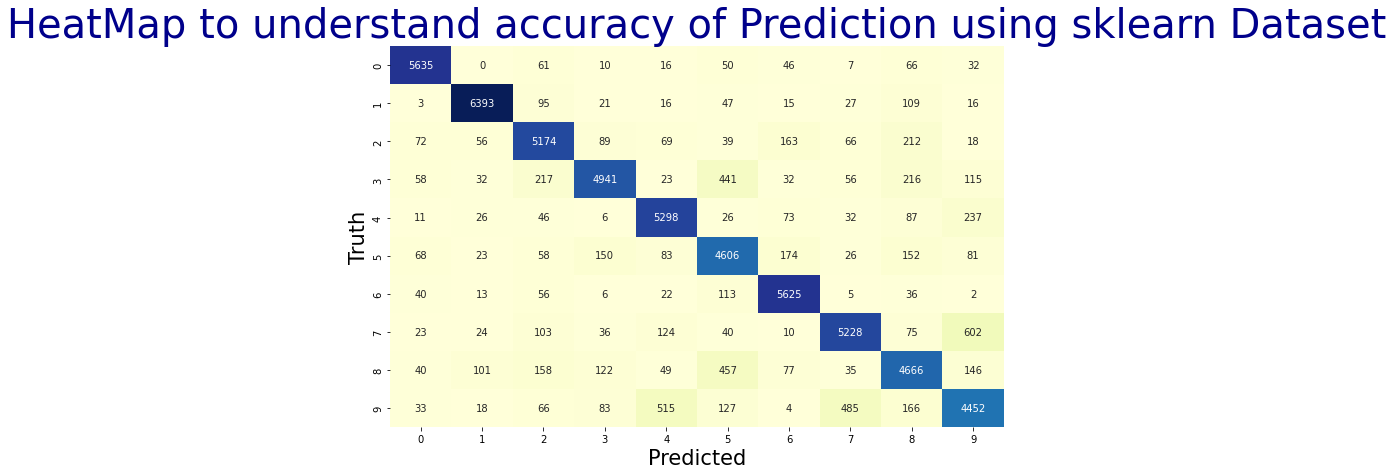

In [161]:

plt.figure(figsize = (11,7))    
sn.heatmap(data = cm,                                  #sn used for better representation
           annot = True,fmt='d',
           cmap="YlGnBu",cbar=False)  
plt.xlabel('Predicted',fontsize=21)
plt.ylabel('Truth',fontsize=21)
plt.title("HeatMap to understand accuracy of Prediction using sklearn Dataset",
          fontsize=40,
          color="Darkblue")

```53892 of the total images are correctly classified as non-5s```
```687 are wrongly classified as 5s (false positive, also called as Type I error)```
```1891 were wrongly classified as non-5s (false negatives, also called as type II errors)```
```3530 were correctly classified as 5s (true positive)```



## Precision = TP/(TP+FP)

## Recall or Sensitivity or TPR (True Positive Rate) = TP/(TP+FN)

In [193]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier





In [ ]:
precision_score(y_train, y_train_pred)

In [ ]:
recall_score(y_train, y_train_pred)

In [ ]:
f1_score(y_train, y_train_pred)

### ROC Curve (Receiver Operating Characteristic)- The curve plots the TPR or recall against the FPR 
### FPR(fall-out) is the ratio of negative instances that are incorrectly classified as Positive

In [ ]:
roc_auc_score(y_train, y_train_pred)

In [ ]:
forest_clf= RandomForestClassifier(random_state=42)

y_probas_forest= cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")

y_probas_forest[:2]

In [ ]:
# Multiclass Classification- 
# One-versus-the-rest- we will be training 10 binary classifier (0 to 9)
# Then when you want to classify an image, you get the decision score from each classifier
# for that image and you select the class whose classifier outputs the highest score (one versus all)

# One-vs-One (1-2,1-3) If there are N classes, you need to train N*(N-1)/2 classifiers
# 45 binary classifiers

from sklearn.svm import SVC

svm_clf= SVC(random_state=42)

svm_clf.fit(x_train[:2000], y_train[:2000])

In [ ]:
svm_clf.predict([some_digit])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf= OneVsRestClassifier(SVC(random_state=42))

ovr_clf.fit(x_train[:2000],y_train[:2000])

In [ ]:
ovr_clf.predict([some_digit])
print(len(ovr_clf.estimators_))

In [ ]:
sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit]).round()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled= scaler.fit_transform(x_train.astype("float64"))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred= cross_val_predict(ovr_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

<div class="alert alert-block alert-danger">
    <b>END</b></div>


# *****  

# ```using Keras```
> Youtube

# Setting the train and test dataSet loading from the MNIST data-set from Keras

In [167]:
(x_train_keras,y_train_keras),(x_test_keras,y_test_keras) = keras.datasets.mnist.load_data()    #from keras

# Just for verifying the attributes of the dataSet

In [168]:
print(len(x_train_keras))                                   #for keras
print(len(x_test_keras))
print(x_train_keras[0].shape)

60000
10000
(28, 28)


# SCale the dataSet Imporves accuracy

In [169]:
x_train_keras = x_train_keras/255.0
x_test_keras = x_test_keras/255.0

# Reshape from 28 to 784

In [170]:
x_train_keras_flattenend = x_train_keras.reshape(len(x_train_keras),28*28)
x_test_keras_flattenend = x_test_keras.reshape(len(x_test_keras),28*28)
print(x_train_keras_flattenend)
print(x_train_keras_flattenend.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(60000, 784)


In [171]:
modell = keras.Sequential([
                                                                       #adding hidden layers
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),      #adding the layers to the cnn,model train now takes more time
    keras.layers.Dense(10,activation='sigmoid')     #dense means all neurons in one layer connected to every neuron in second layer    
])


In [172]:
modell.compile(
    optimizer = 'adam',       #optimizer helps train efficiently in global way
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']        
             
    )        


In [173]:
modell.fit(x_train_keras_flattenend,y_train_keras,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2712 - accuracy: 0.9243
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1242 - accuracy: 0.9632
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0867 - accuracy: 0.9743
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661 - accuracy: 0.9798
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0528 - accuracy: 0.9840
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0422 - accuracy: 0.9871
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0351 - accuracy: 0.9888



# To evaluate the trained model for the recognization  here from the                test-dataSet

In [174]:
model.evaluate(x_test_keras_flattenend,y_test_keras)

313/313 [==============================] - 0s 1ms/step - loss: 0.2693 - accuracy: 0.9249


[0.2692551612854004, 0.9248999953269958]

(-0.5, 27.5, 27.5, -0.5)

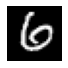

In [176]:
i = 11                         # i is the array index to be evaluated
#i = input("Enter i=")
plt.figure(figsize = (1,1))    
plt.imshow(x_test_keras[i],cmap='gray')
plt.axis("off")


In [177]:
y_predicted = model.predict(x_test_keras_flattenend)       #whole model.predicted is stored in array 
print(y_predicted[i])

313/313 [==============================] - 0s 1ms/step
[1.1953426e-02 4.3106693e-04 1.0443972e-01 2.1290947e-02 4.0474394e-03
 7.2894321e-04 6.7874044e-01 1.5605090e-05 1.3919687e-01 2.1808106e-04]


# predicted value output

In [178]:
np.argmax(y_predicted[i])

6

# Build confusion matrix

In [179]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [181]:
confusion_matrix = (tf.math.confusion_matrix(labels=y_test_keras,predictions=y_predicted_labels))

Text(0.5, 1.0, 'HeatMap to understand accuracy of Prediction using Keras Dataset')

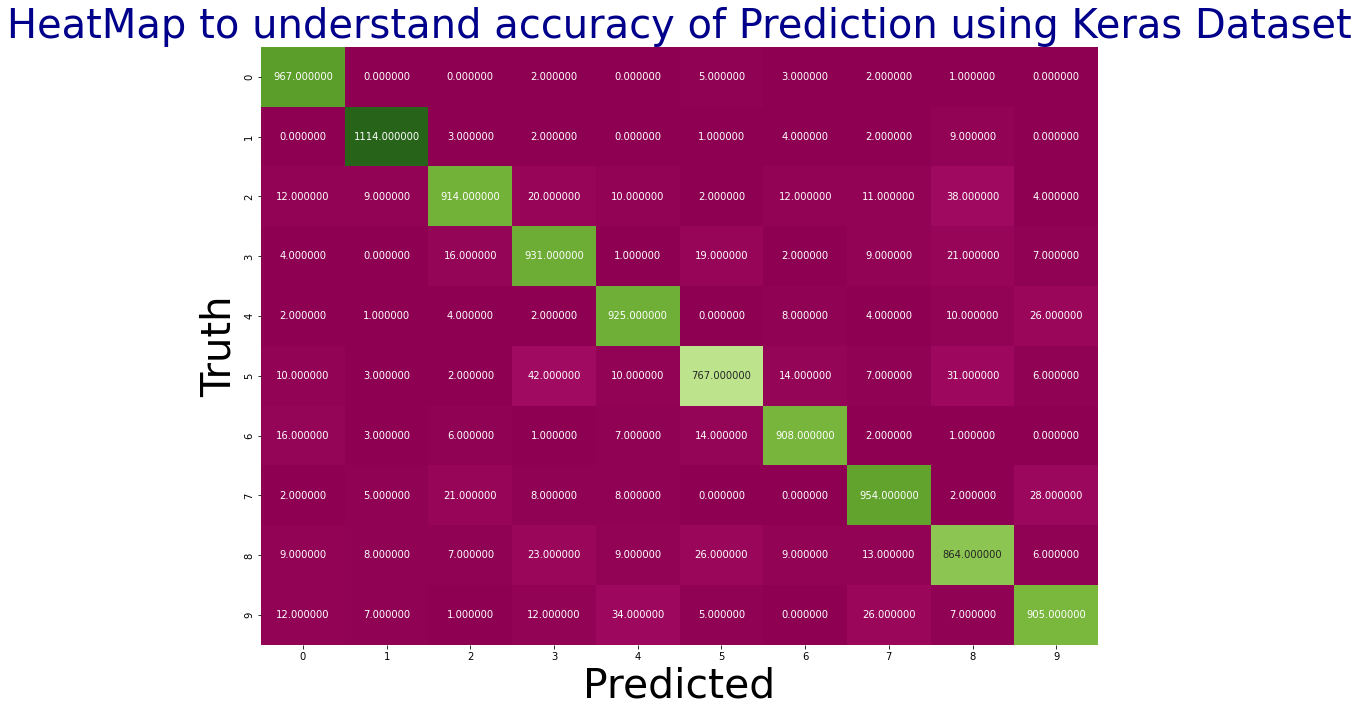

In [192]:

plt.figure(figsize = (15,11))    
sn.heatmap(data = confusion_matrix,                                  #sn used for better representation
           annot = True,fmt='f',
           cmap="PiYG",cbar=False)  
plt.xlabel('Predicted',fontsize=41)
plt.ylabel('Truth',fontsize=40)
plt.title("HeatMap to understand accuracy of Prediction using Keras Dataset",
          fontsize=40,
          color="Darkblue")


<div class="alert alert-block alert-danger">
    <b>END</b></div>